### KNeighbors Classifier

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("hw2train.csv")
test = pd.read_csv("hw2test.csv")

In [2]:
train.head()

,X1,X2,Target
0,31,22,2
1,194,20,2
2,75,11,2
3,103,15,1
4,255,20,2


In [3]:
test.head()

,X1,X2,Target
0,255,11,2
1,224,7,2
2,114,14,1
3,255,22,2
4,67,6,1


In [4]:
#converting data to arrays

trainX = train.iloc[:, :-1].values         #X for train data (2d array)
trainy = train.iloc[:,-1:].values          #y for train data (2d array)
trainy=trainy.flatten()                     #1d array

testX = test.iloc[:, :-1].values           #X for test data
testy = test.iloc[:,-1:].values            #y for test data
testy=testy.flatten()                       #1d array

In [5]:
print(trainX)
print()
print(trainy)

[[ 31  22]
 [194  20]
 [ 75  11]
 ...
 [213  20]
 [255  12]
 [255   7]]

[2 2 2 ... 2 2 2]


In [6]:
print(testX)
print()
print(testy)

[[255  11]
 [224   7]
 [114  14]
 ...
 [158  17]
 [255  25]
 [107  16]]

[2 2 1 ... 2 2 1]


In [7]:
#trying k=5 for traning and testing data

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX, trainy)
y_pred = knn.predict(trainX)
print(metrics.accuracy_score(trainy, y_pred))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(testX, testy)
y_pred = knn.predict(testX)
print(metrics.accuracy_score(testy, y_pred))

0.8256
0.858


In [8]:
#trying k=1 for traning and testing data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainX, trainy)
y_pred = knn.predict(trainX)
print(metrics.accuracy_score(trainy, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(testX, testy)
y_pred = knn.predict(testX)
print(metrics.accuracy_score(testy, y_pred))

0.8692
0.843


In [9]:
print(trainX.shape)
print(testX.shape)

print(trainy.shape)
print(testy.shape)

(2500, 2)
(5000, 2)
(2500,)
(5000,)


In [10]:
from sklearn.model_selection import train_test_split

trainX_train, trainX_test, trainy_train, trainy_test = train_test_split(trainX, trainy, test_size=0.2, random_state=2)

testX_train, testX_test, testy_train, testy_test = train_test_split(testX, testy, test_size=0.2, random_state=2)

In [11]:
print(trainX_train.shape)
print(trainX_test.shape)
print(trainy_train.shape)
print(trainy_test.shape)

print()

print(testX_train.shape)
print(testX_test.shape)
print(testy_train.shape)
print(testy_test.shape)

(2000, 2)
(500, 2)
(2000,)
(500,)

(4000, 2)
(1000, 2)
(4000,)
(1000,)


In [12]:
#trying k=5 for traning data

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX_train, trainy_train)
trainy_pred = knn.predict(trainX_test)
print(metrics.accuracy_score(trainy_test, trainy_pred))

0.822


In [13]:
#trying k=5 for testing data

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(testX_train, testy_train)
testy_pred = knn.predict(testX_test)
print(metrics.accuracy_score(testy_test, testy_pred))

0.822


In [14]:
#trying k=1 for traning data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainX_train, trainy_train)
trainy_pred = knn.predict(trainX_test)
print(metrics.accuracy_score(trainy_test, trainy_pred))

0.798


In [15]:
#trying k=1 for testing data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(testX_train, testy_train)
testy_pred = knn.predict(testX_test)
print(metrics.accuracy_score(testy_test, testy_pred))

0.759


In [16]:
# try k=1 through k=25 and record training and testing accuracy
k_range = range(1, 26)

train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainX_train, trainy_train)
    trainy_pred = knn.predict(trainX_test)
    train_scores.append(metrics.accuracy_score(trainy_test, trainy_pred))
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(testX_train, testy_train)
    testy_pred = knn.predict(testX_test)
    test_scores.append(metrics.accuracy_score(testy_test, testy_pred))
    


In [17]:
print(train_scores)
print()
print(test_scores)

[0.798, 0.76, 0.812, 0.794, 0.822, 0.796, 0.83, 0.808, 0.822, 0.786, 0.802, 0.794, 0.798, 0.798, 0.796, 0.79, 0.796, 0.786, 0.788, 0.792, 0.794, 0.792, 0.788, 0.792, 0.794]

[0.759, 0.678, 0.82, 0.778, 0.822, 0.787, 0.821, 0.814, 0.825, 0.815, 0.83, 0.829, 0.829, 0.827, 0.827, 0.828, 0.83, 0.831, 0.83, 0.83, 0.827, 0.826, 0.823, 0.819, 0.823]


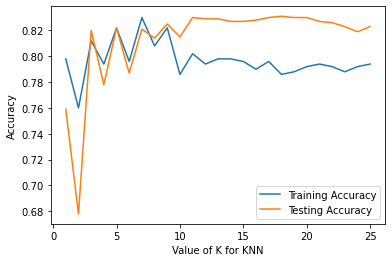

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range,train_scores)

plt.plot(k_range,test_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

plt.legend(["Training Accuracy", "Testing Accuracy"])

In [19]:
#performance of best k on training data
#best k is 7 for training data

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(trainX_train, trainy_train)
trainy_pred = knn.predict(trainX_test)
print(metrics.accuracy_score(trainy_test, trainy_pred))

0.83


In [20]:
#performance of best k on testing data
#best k is 7 for training data

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(testX_train, testy_train)
testy_pred = knn.predict(testX_test)
print(metrics.accuracy_score(testy_test, testy_pred))

0.821
